In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
plt.style.use('dark_background')
pd.options.display.max_columns=None
pd.set_option('display.float_format',lambda x:'%.6f' %x)
import warnings
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv("/content/drive/MyDrive/bank-additional-full.csv",sep=";")

In [8]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.000000,40.024060,10.421250,17.000000,32.000000,38.000000,47.000000,98.000000
duration,41188.000000,258.285010,259.279249,0.000000,102.000000,180.000000,319.000000,4918.000000
campaign,41188.000000,2.567593,2.770014,1.000000,1.000000,2.000000,3.000000,56.000000
pdays,41188.000000,962.475454,186.910907,0.000000,999.000000,999.000000,999.000000,999.000000
previous,41188.000000,0.172963,0.494901,0.000000,0.000000,0.000000,0.000000,7.000000
emp.var.rate,41188.000000,0.081886,1.570960,-3.400000,-1.800000,1.100000,1.400000,1.400000
cons.price.idx,41188.000000,93.575664,0.578840,92.201000,93.075000,93.749000,93.994000,94.767000
cons.conf.idx,41188.000000,-40.502600,4.628198,-50.800000,-42.700000,-41.800000,-36.400000,-26.900000
euribor3m,41188.000000,3.621291,1.734447,0.634000,1.344000,4.857000,4.961000,5.045000
nr.employed,41188.000000,5167.035911,72.251528,4963.600000,5099.100000,5191.000000,5228.100000,5228.100000


In [11]:
data.shape

(41188, 21)

In [12]:
data.shape[0]

41188

In [13]:
data[data.y=='yes'].shape[0]

4640

In [14]:
data[data.y=='no'].shape[0]

36548

# EDA

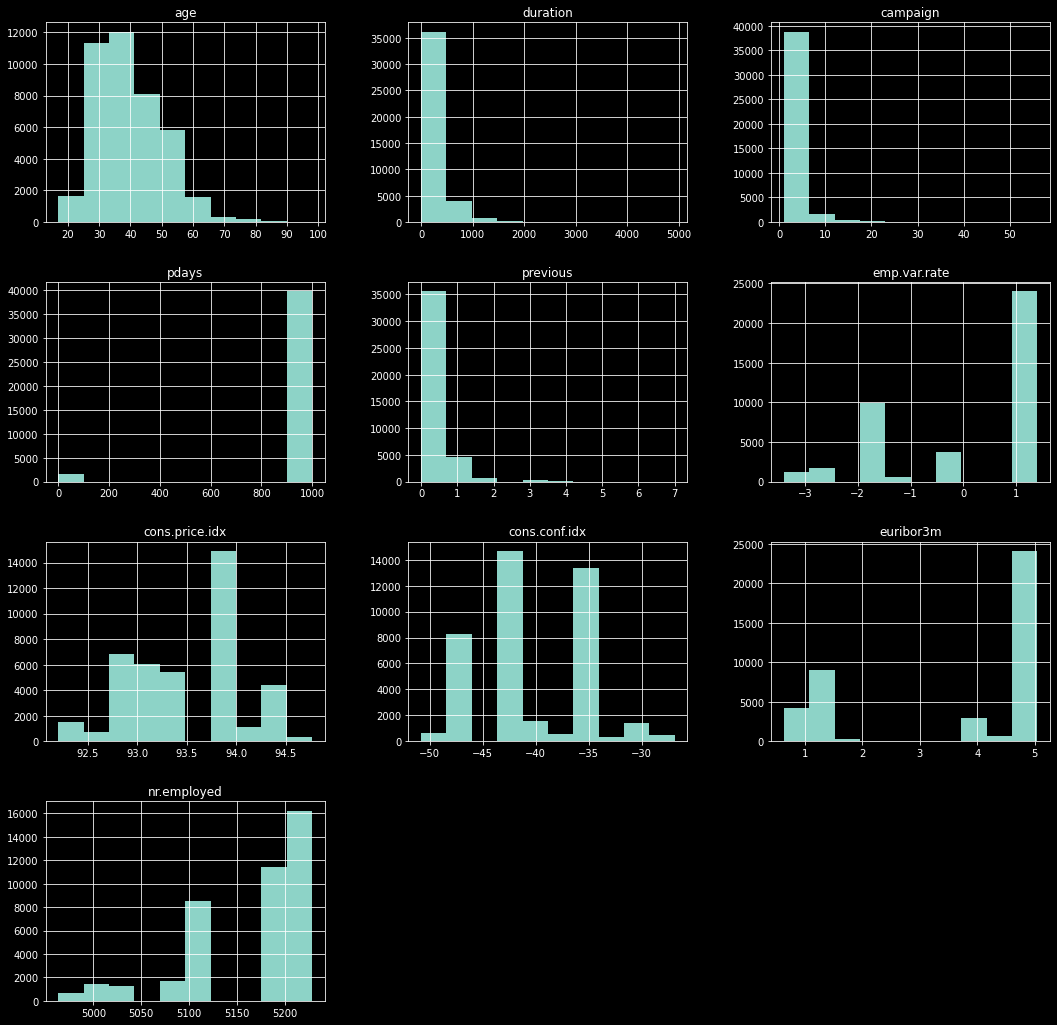

In [15]:
fig = data.hist(figsize = (18,18))

In [16]:
#Univariate Analysis

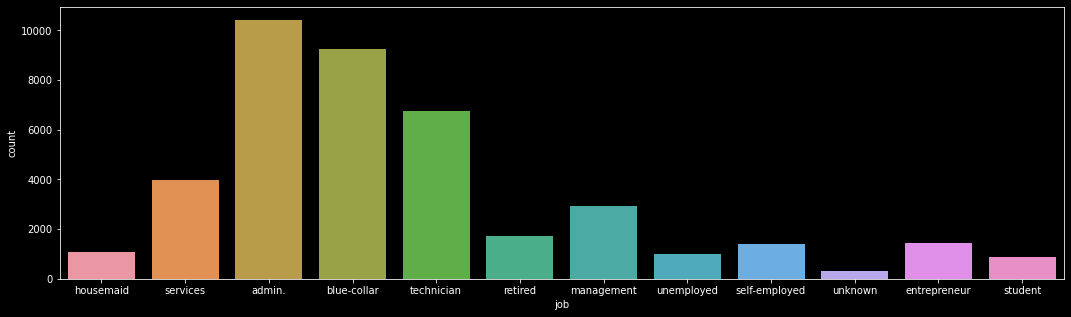

In [17]:
plt.figure(figsize=(18,5))
sns.countplot(data['job'])

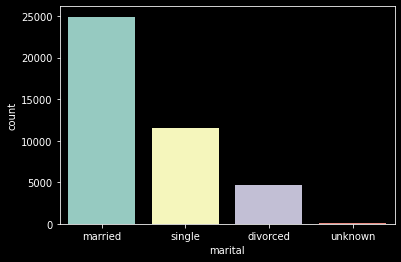

In [18]:
sns.countplot(data['marital'])

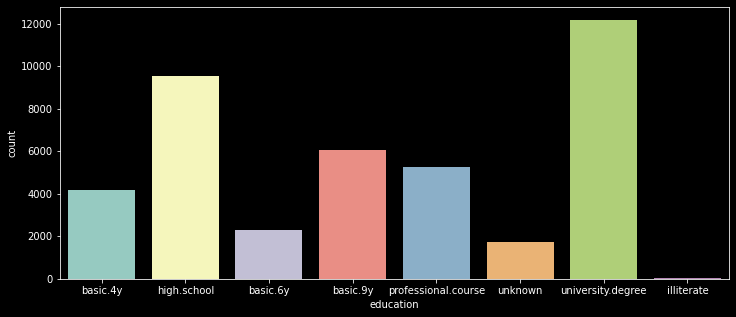

In [19]:
plt.figure(figsize=(12,5))
sns.countplot(data['education'])

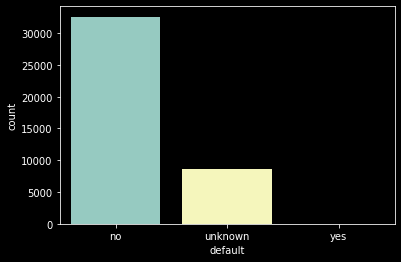

In [20]:
#plt.figure(figsize=(20,5))
sns.countplot(data['default'])

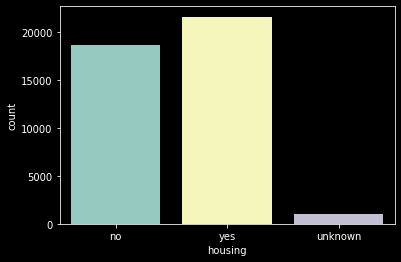

In [21]:
sns.countplot(data['housing'])

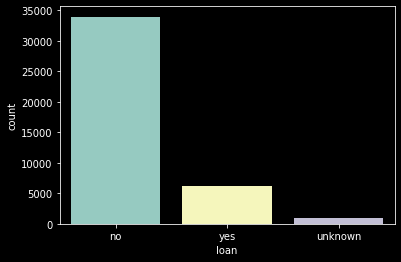

In [22]:
sns.countplot(data['loan'])

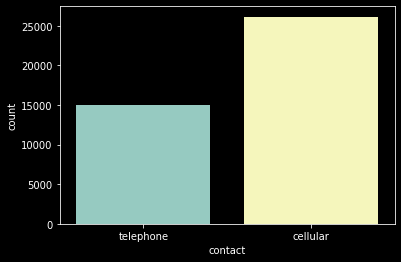

In [23]:
sns.countplot(data['contact'])

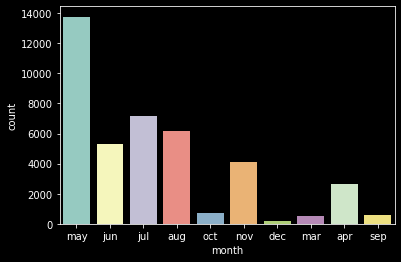

In [24]:
sns.countplot(data['month'])

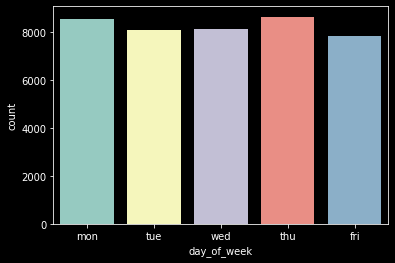

In [25]:
sns.countplot(data['day_of_week'])

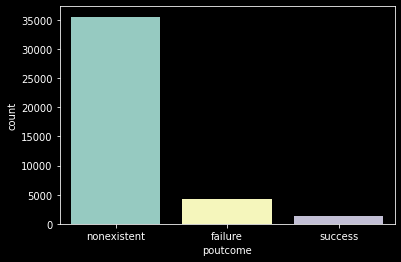

In [26]:
sns.countplot(data['poutcome'])

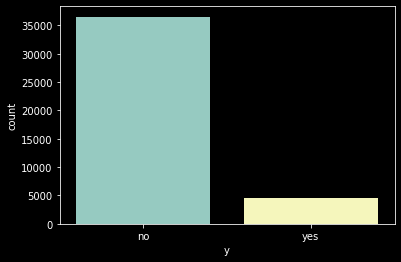

In [27]:
sns.countplot(data['y'])

In [28]:
#Bivariate Analysis

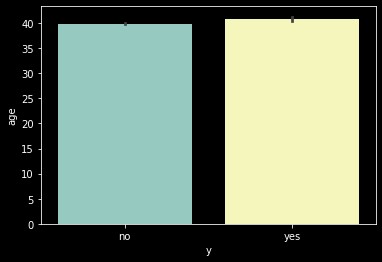

In [29]:
#1.age vs target
#plt.figure(figsize=(18,5))
sns.barplot(data['y'],data['age'])

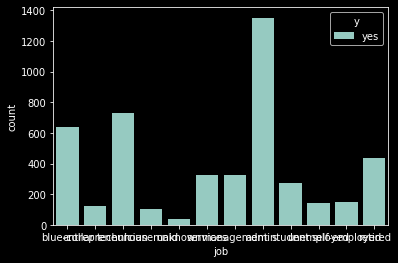

In [30]:
#plt.rcParams['figure.figsize']=[18,8]
#(pd.crosstab(data[data['y']=='yes'],data['job'], 
     #        normalize='index')
   #.plot.bar(stacked=True)
#)
y=data.loc[(data['y']=='yes')]
#sns.barplot(data['job'])

sns.countplot(y['job'],hue=y['y'])


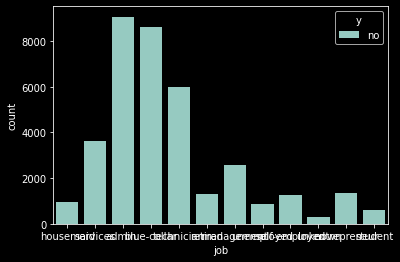

In [31]:
n=data.loc[(data['y']=='no')]
sns.countplot(n['job'],hue=n['y'])

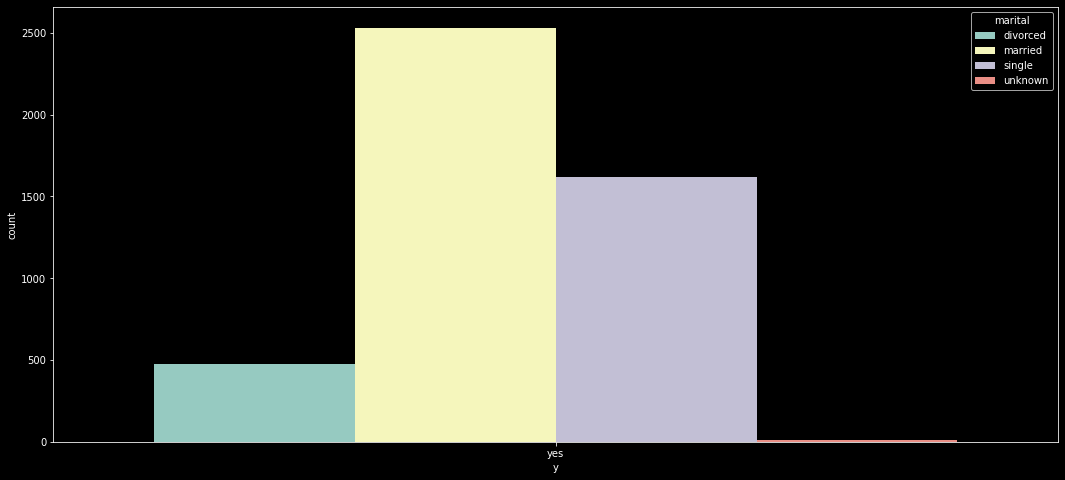

In [32]:
plt.figure(figsize=(18,8))

y=data.loc[(data['y']=='yes')]
sns.countplot(y['y'],hue=y['marital'])


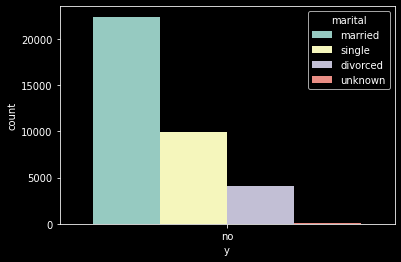

In [33]:
n=data.loc[(data['y']=='no')]
sns.countplot(n['y'],hue=n['marital'])


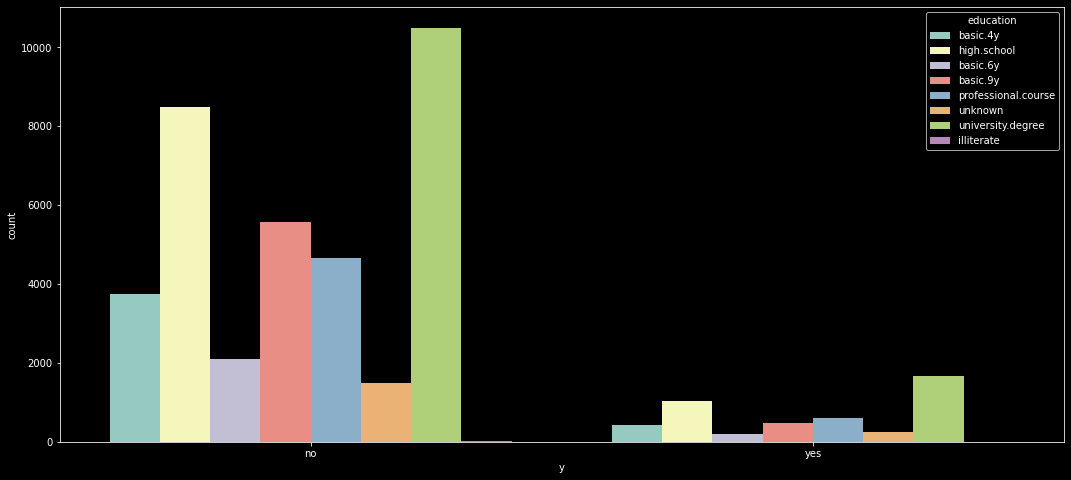

In [34]:
plt.figure(figsize=(18,8))
sns.countplot(data['y'],hue=data['education'])

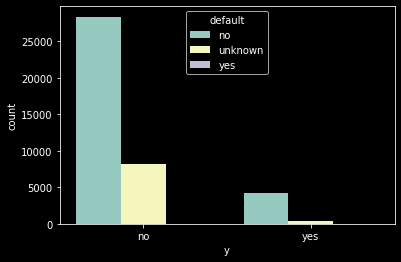

In [35]:
sns.countplot(data['y'],hue=data['default'])

In [36]:
data['y'].value_counts()


no     36548
yes     4640
Name: y, dtype: int64

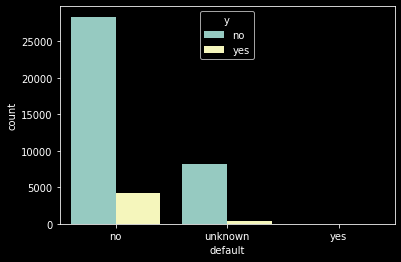

In [37]:
sns.countplot(data['default'],hue=data['y'])

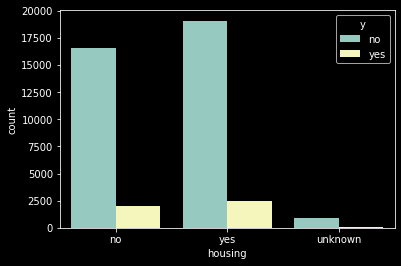

In [38]:
sns.countplot(data['housing'],hue=data['y'])

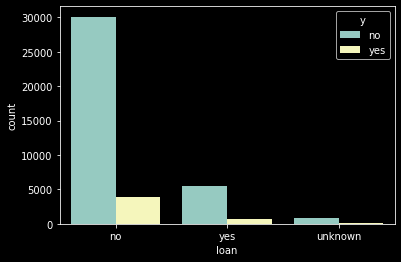

In [39]:
sns.countplot(data['loan'],hue=data['y'])

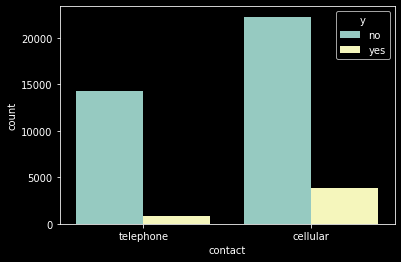

In [40]:
sns.countplot(data['contact'],hue=data['y'])

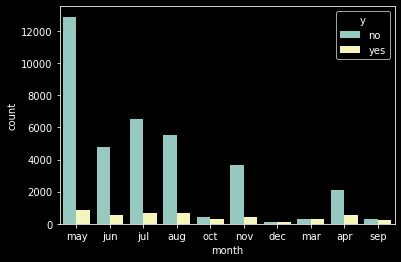

In [41]:
sns.countplot(data['month'],hue=data['y'])

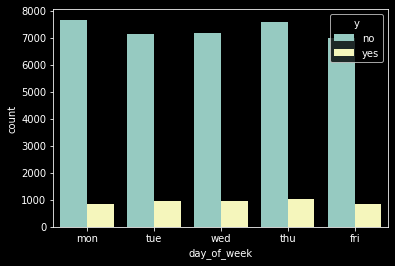

In [42]:
sns.countplot(data['day_of_week'],hue=data['y'])

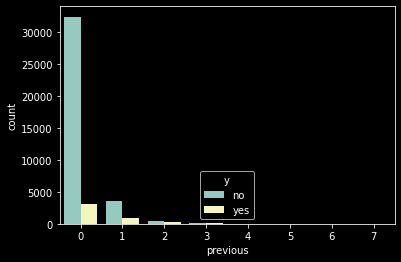

In [43]:
sns.countplot(data['previous'],hue=data['y'])

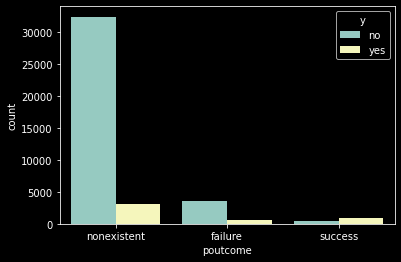

In [44]:
sns.countplot(data['poutcome'],hue=data['y'])

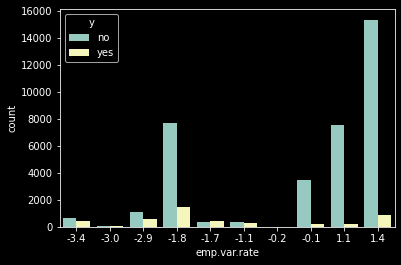

In [45]:
sns.countplot(data['emp.var.rate'],hue=data['y'])

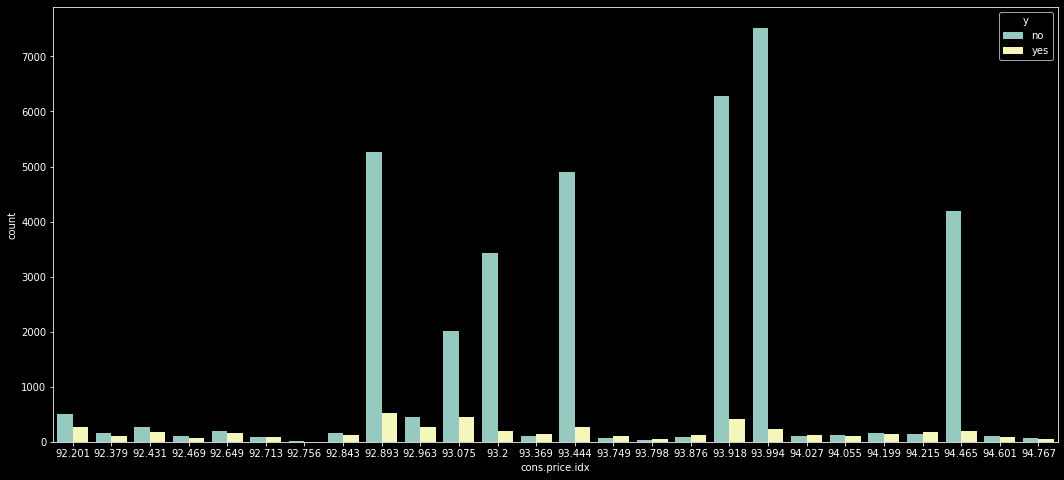

In [46]:
plt.figure(figsize=(18,8))
sns.countplot(data['cons.price.idx'],hue=data['y'])

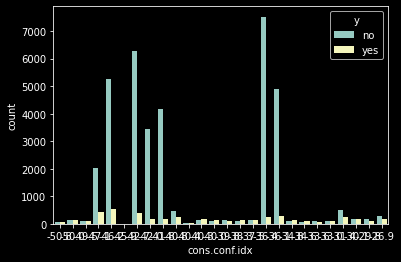

In [47]:
sns.countplot(data['cons.conf.idx'],hue=data['y'])

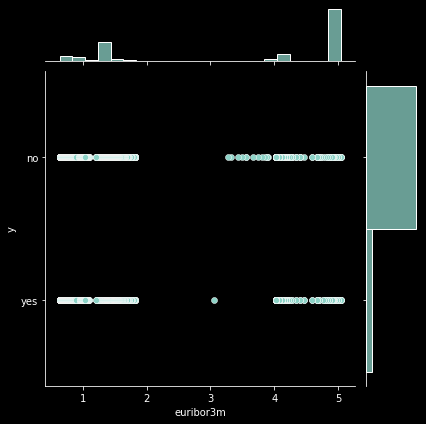

In [48]:
sns.jointplot(data['euribor3m'],data['y'])

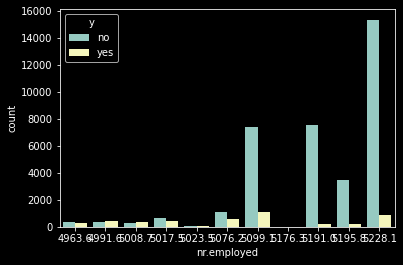

In [49]:
sns.countplot(data['nr.employed'],hue=
              data['y'])

# Inferences

1.Bank's most customers are from Admin job and blue collar job background.
2.There is no history of any credict default of any customer.
3.Most customers have university degree.
4.Highest contacts made were in the month of May.
5.In the case of a yes or no for taking a term deposit married people are higher.
6.Mostly people who have housing loan said no for term deposit.
7.There are very less successful outcomes from previous campaigns most of them are non existent.
8.The target variable is highly imbalanced and data for yes class is very less and due to this biasness model may end up being overfitted.

# Label Encoding

In [50]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['y']= label_encoder.fit_transform(data['y'])
  
    
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0


In [51]:
cat=data.select_dtypes(include='object')


In [52]:
num=data.select_dtypes(include=[np.number])

In [53]:
cat_dum=pd.get_dummies(cat,drop_first=True)

In [54]:
df=pd.concat([num,cat_dum],axis=1)

In [55]:
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.100000,94.767000,-50.800000,1.028000,4963.600000,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.100000,94.767000,-50.800000,1.028000,4963.600000,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.100000,94.767000,-50.800000,1.028000,4963.600000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.100000,94.767000,-50.800000,1.028000,4963.600000,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


# Handling Class Imbalance

In [56]:
x=df.iloc[:,df.columns!= 'y']
y=df.iloc[:,df.columns == 'y']

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [58]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((28831, 53), (12357, 53), (28831, 1), (12357, 1))

In [59]:
x_train.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_s

In [60]:
x_test.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_s

In [61]:
df_new=pd.concat([x_train,y_train],axis=1)

In [62]:
df_new['y'].value_counts()

0    25613
1     3218
Name: y, dtype: int64

In [63]:
X=df_new.drop('y',axis=1)
Y=df_new['y']

In [64]:
from imblearn.over_sampling import SMOTE 

In [65]:
sm = SMOTE(sampling_strategy='auto', random_state=None,k_neighbors=3)
x_train_res, y_train_res = sm.fit_resample(X, Y) 

In [66]:
df_=pd.concat([x_train_res,y_train_res],axis=1)

In [67]:
df_['y'].value_counts()

0    25613
1    25613
Name: y, dtype: int64

In [68]:
x_train_res.shape

(51226, 53)

In [69]:
y_train_res.shape

(51226,)

In [70]:
#we see that data is imbalance
#handle class imbalance
#data analysis(univariate,bivariate)
#label encoder
#cross validation
#regularisation
#check overfitting
#feature selection
#pca
#halving gridsearch

In [71]:
#data.head(5)

In [72]:
#One Hot Encoding for categorical variables
#cat_cols=[col for col in data.columns.values if data[col].dtype=='object']
#data_cat=data[cat_cols]
#data_num=data.drop(cat_cols,axis=1)

In [73]:
#data_num

In [74]:
#data_cat_dummies=pd.get_dummies(data_cat,drop_first=True)


In [75]:
num=num.drop('y',axis=1)
corr=num.corr()
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


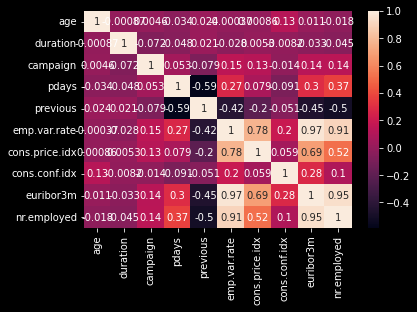

In [76]:
sns.heatmap(corr,annot=True)

# Support Vector Machine

In [77]:
svclassifier=SVC(kernel='linear')
svclassifier.fit(x_train_res,y_train_res)

SVC(kernel='linear')

In [78]:
y_pred=svclassifier.predict(x_test)

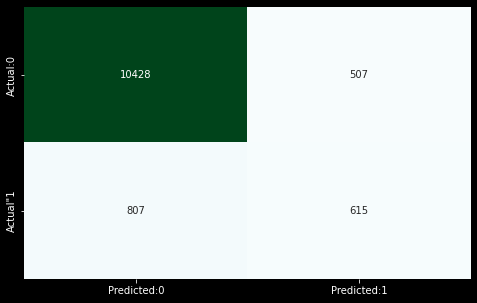

In [79]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual"1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap="BuGn",cbar=False)

In [80]:
result=classification_report(y_test,y_pred)

In [81]:
print(result)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     10935
           1       0.55      0.43      0.48      1422

    accuracy                           0.89     12357
   macro avg       0.74      0.69      0.71     12357
weighted avg       0.88      0.89      0.89     12357



In [82]:
roc1=round(metrics.roc_auc_score(y_test,y_pred),4)
roc1

0.6931

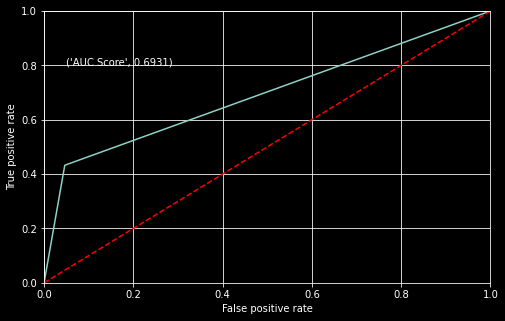

In [83]:
plt.rcParams['figure.figsize']=(8,5)
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--')

plt.text(x=0.05,y=0.8, s=('AUC Score',round(metrics.roc_auc_score(y_test,y_pred),4)))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.grid(True)

In [84]:
#kernel=rbf
svclassifier1=SVC(kernel='rbf')
svclassifier1.fit(x_train,y_train)

SVC()

In [85]:
y_pred1=svclassifier1.predict(x_test)

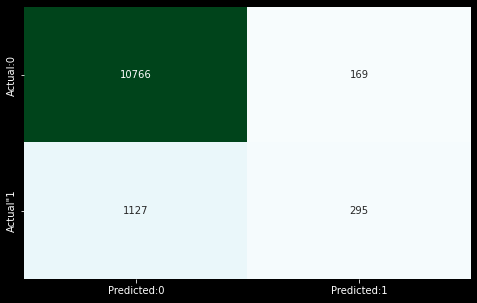

In [86]:
cm=confusion_matrix(y_test,y_pred1)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual"1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap="BuGn",cbar=False)

In [87]:
result=classification_report(y_test,y_pred1)

In [88]:
print(result)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10935
           1       0.64      0.21      0.31      1422

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.63     12357
weighted avg       0.87      0.90      0.87     12357



In [89]:
roc2=round(metrics.roc_auc_score(y_test,y_pred1),4)
roc2

0.596

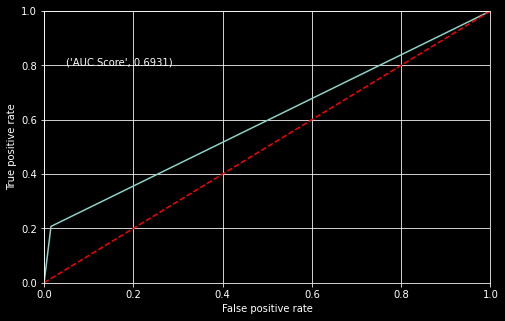

In [90]:
plt.rcParams['figure.figsize']=(8,5)
fpr,tpr,thresholds=roc_curve(y_test,y_pred1)

plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--')

plt.text(x=0.05,y=0.8, s=('AUC Score',round(metrics.roc_auc_score(y_test,y_pred),4)))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.grid(True)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10935
           1       0.64      0.21      0.32      1422

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.63     12357
weighted avg       0.87      0.90      0.87     12357



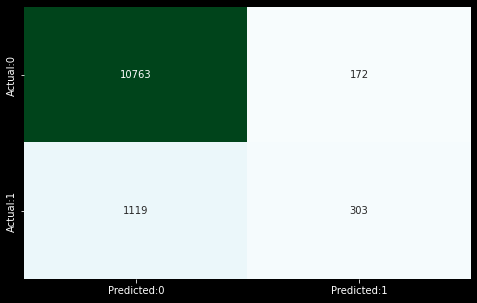

In [91]:
#polynomial kernel
svclassifier_poly=SVC(kernel='poly')
svclassifier_poly.fit(x_train,y_train)
y_pred_poly=svclassifier_poly.predict(x_test)
cm=confusion_matrix(y_test,y_pred_poly)
conf_matrix=pd.DataFrame(cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='BuGn',cbar=False)
result=classification_report(y_test,y_pred_poly)
print(result)


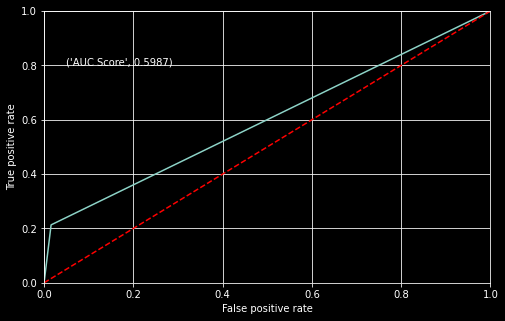

In [92]:
plt.rcParams['figure.figsize']=(8,5)
fpr,tpr,thresholds=roc_curve(y_test,y_pred_poly)

plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--')

plt.text(x=0.05,y=0.8, s=('AUC Score',round(metrics.roc_auc_score(y_test,y_pred_poly),4)))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.grid(True)

In [93]:
roc3=round(metrics.roc_auc_score(y_test,y_pred_poly),4)
roc3

0.5987

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10935
           1       0.64      0.21      0.32      1422

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.63     12357
weighted avg       0.87      0.90      0.87     12357



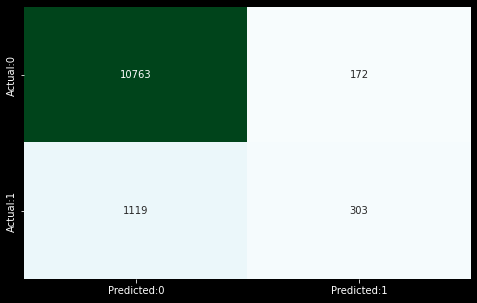

In [94]:
#polynomial with degree=2
svclassifier_poly1=SVC(kernel='poly',degree=2)
svclassifier_poly1.fit(x_train,y_train)
y_pred_poly1=svclassifier_poly.predict(x_test)
cm=confusion_matrix(y_test,y_pred_poly1)
conf_matrix=pd.DataFrame(cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='BuGn',cbar=False)
result=classification_report(y_test,y_pred_poly1)
print(result)

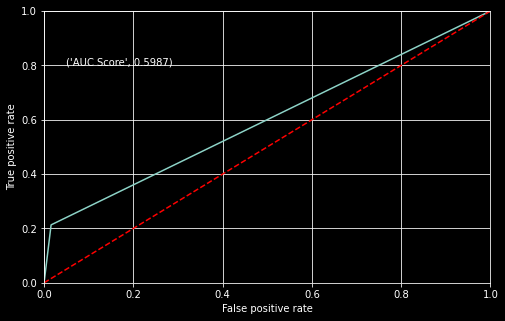

In [95]:
plt.rcParams['figure.figsize']=(8,5)
fpr,tpr,thresholds=roc_curve(y_test,y_pred_poly1)

plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.plot([0,1],[0,1],'r--')

plt.text(x=0.05,y=0.8, s=('AUC Score',round(metrics.roc_auc_score(y_test,y_pred_poly1),4)))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.grid(True)

In [96]:
roc4=round(metrics.roc_auc_score(y_test,y_pred_poly1
                                ),4)
roc4

0.5987

In [97]:
#No change in accuracy by changing degree

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10935
           1       0.64      0.20      0.31      1422

    accuracy                           0.89     12357
   macro avg       0.77      0.59      0.62     12357
weighted avg       0.87      0.89      0.87     12357



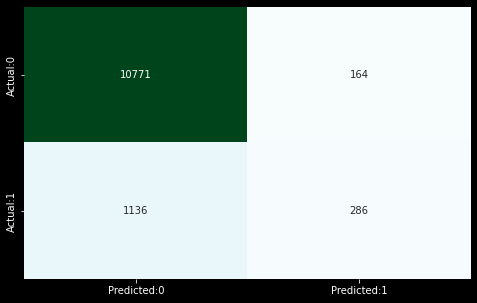

In [98]:
# 'sigmoid'
svclassifier_sigmoid=SVC(kernel='sigmoid')
svclassifier_sigmoid.fit(x_train,y_train)
y_pred_sigmoid=svclassifier_sigmoid.predict(x_test)
cm=confusion_matrix(y_test,y_pred_sigmoid)
conf_matrix=pd.DataFrame(cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='BuGn',cbar=False)
result=classification_report(y_test,y_pred_sigmoid)
print(result)

Text(0, 0.5, 'True Positive Rate')

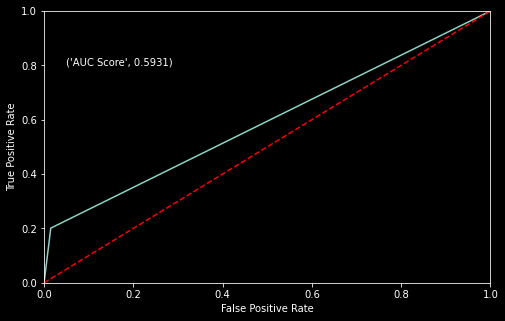

In [99]:
plt.figure(figsize=(8,5))

fpr,tpr,thresholds=roc_curve(y_test,y_pred_sigmoid)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.05,y=0.8,s=('AUC Score',round(metrics.roc_auc_score(y_test,y_pred_sigmoid),4))
        )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [100]:
roc5=round(metrics.roc_auc_score(y_test,y_pred_sigmoid),4)
roc5

0.5931

In [101]:
comp=pd.DataFrame([{"Kernel":"Linear",
                   "Accuracy":roc1},
                  {"Kernel":"rbf",
                  "Accuracy":roc2},
                  {"Kernel":"polynomial",
                    "Accuracy":roc3},
                   {"Kernel":"polynomial_degree2",
                    "Accuracy":roc4},
                   {"Kernel":"sigmoid",
                  "Accuracy":roc5},
                ],index=[1,2,3,4,5
                        ])

In [102]:
comp

,Kernel,Accuracy
1,Linear,0.693100
2,rbf,0.596000
3,polynomial,0.598700
4,polynomial_degree2,0.598700
5,sigmoid,0.593100
